
# Project: Investigate a TMDb movie database (tmdb-movies.csv)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>In this report I analyze data from the TMDb movie data base provided by Kaggle.
>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 

>● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

>● There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.

>● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

> At the end of this section, I describe the questions that I plan on exploring over the course of the report. 

In [8]:
# This cell is used to set up import statements for all of the packages that I
# plan to use.
import numpy as np
import pandas as pd
import seaborn as sns
import csv
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline


In [9]:
# reading the csv file and store it as a pandas dataframe df
def load_data():
    df = pd.read_csv('tmdb-movies.csv')
    return df
# Print the first rows of df
df = load_data()
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
#print all column titles
def print_columns(df):
    for column in df.columns:
        print(column)
        
print_columns(df)

id
imdb_id
popularity
budget
revenue
original_title
cast
homepage
director
tagline
keywords
overview
runtime
genres
production_companies
release_date
vote_count
vote_average
release_year
budget_adj
revenue_adj


**Some general questions:**
> **Question 1.1:** Which movie was most and least popular?

> **Question 1.2:** Which movie had the longest and shortest runtime?

> **Question 1.3:** What is the average runtime of all movies and relation of runtime to popularity?

> **Question 1.4:** Which movie had the highest and lowest profit and relation of profit to runtime and popularity?

> **Question 1.5:** Which movie had the highest and lowest budget and relation of budget to profit, runtime and popularity?

**Questions about most popular movies:**

> **Question 2:** Which genre was most produced above the 75% percentile mark of popularity?

> **Question 3:** Which cast was most selected?

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will check for cleanliness, and then trim and clean your dataset for analysis.

### General Properties

In [11]:
# Perform operations to inspect data types and look for instances of missing or possibly errant data.
# Print first few lines of the dataset
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
#General statistics of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [13]:
#Understand the cleaniness of the dataset by looking at datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [14]:
# Check how many rows have 0 Dollars budget within the dataset.
budget_value_count = (df['budget']==0).sum()
print('There are {} rows with a budget of 0 Dollars'.format(budget_value_count))

There are 5696 rows with a budget of 0 Dollars


In [15]:
# Check how many rows have 0 Dollars revenue within the dataset.
revenue_value_count = (df['revenue']==0).sum()
print('There are {} rows with a revenue of 0 Dollars'.format(revenue_value_count))

There are 6016 rows with a revenue of 0 Dollars


In [16]:
# Check for duplicated rows within the dataset
duplicate_rows_count = sum(df.duplicated())
print('There are {} rows duplicated'.format(duplicate_rows_count))

There are 1 rows duplicated


> **The following areas have been identified as potential data cleaning steps.**
>1. Delete the duplicate row
>2. Remove columns that are not relevant to my analysis such as: 'id','imdb_id','homepage','tagline','keywords','overview','vote_count','vote_average','budget_adj','revenue_adj'
>3. Convert 'release_date' column into date format
>4. Fill rows that have 0 dollars budget or revenue with NaN and then drop those rows because we cannot use this data to calculate profits
>5. We change the runtime value of 0 to NaN


### Data Cleaning (Replace this with more specific notes!)

**Step 1:**
Deletion of the duplicate row


In [17]:
#We delete one of the duplicate rows and we keep the first one
df.drop_duplicates(keep='first',inplace=True)
#Check for total value count of rows and col
rows, cols = df.shape
print('There are {} total rows and {} columns.'.format(rows-1, cols))

There are 10864 total rows and 21 columns.


**Step 2:** Remove columns 'id','imdb_id','homepage','tagline','keywords','overview','vote_count','vote_average','budget_adj','revenue_adj'

In [18]:
# Variable of coloumns that I will delete
deleted_columns = [ 'id','imdb_id','homepage','tagline','keywords','overview','vote_count','vote_average','budget_adj','revenue_adj']
# To drop the coloumns
df.drop(deleted_columns, axis=1, inplace=True)
# Display top few lines of the dataset
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2015


In [20]:
#print all columns to see if it was adjusted
print_columns(df)

popularity
budget
revenue
original_title
cast
director
runtime
genres
production_companies
release_date
release_year


**Step 3:** Convert 'release_date' column into date format

In [21]:
# Convert column release_date to datetime format
df.release_date = pd.to_datetime(df['release_date'])
# Display the top few lines of the dataset
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015


**Step 4:** Delete rows that have 0 dollars budget or revenue because we cannot use this datato calculate profits


In [22]:
# Columns to check
checked_columns = ['budget', 'revenue']
# Replace 0 with NAN
df[checked_columns] = df[checked_columns].replace(0, np.NaN)
# Drop rows which contains NaN
df.dropna(subset = checked_columns, inplace = True)
rows, cols = df.shape
print('There are now {} rows.'.format(rows-1))

There are now 3853 rows.


##### **Step 5:** Change the runtime value of 0 to NaN

In [23]:
# Change runtime value of 0 to NaN
df['runtime'] = df['runtime'].replace(0, np.NaN)
# General Statistics
df.describe()

,popularity,budget,revenue,runtime,release_year
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000
mean,1.191554,3.720370e+07,1.076866e+08,109.220291,2001.261028
std,1.475162,4.220822e+07,1.765393e+08,19.922820,11.282575
min,0.001117,1.000000e+00,2.000000e+00,15.000000,1960.000000
25%,0.462367,1.000000e+07,1.360003e+07,95.000000,1995.000000
50%,0.797511,2.400000e+07,4.480000e+07,106.000000,2004.000000
75%,1.368324,5.000000e+07,1.242125e+08,119.000000,2010.000000
max,32.985763,4.250000e+08,2.781506e+09,338.000000,2015.000000


Data Cleaning has been completed

<a id='eda'></a>
## Exploratory Data Analysis

> Now that I've trimmed and cleaned the data, we're ready to move on to exploration. We compute statistics and create visualizations with the goal of addressing the research questions that I posed in the Introduction section.

### Research Question 1.1: Which movie was most and least popular?


In [24]:
# Show the movie which ist most popular
most_popular_movie = df.loc[df['popularity'].idxmax()]
print('The movie {} is the most popular. With a popularity of {}'.format(most_popular_movie['original_title'],most_popular_movie['popularity']))

The movie Jurassic World is the most popular. With a popularity of 32.985763


In [25]:
# Show the movie which ist least popular
least_popular_movie = df.loc[df['popularity'].idxmin()]
print('The movie {} is the least popular. With a popularity of {}'.format(least_popular_movie['original_title'],least_popular_movie['popularity']))

The movie Born into Brothels is the least popular. With a popularity of 0.001117


> The most popular movie is Jurassic World.
> The least popular movie is Born into Brothels

### Research Question 1.2: Which movie has the longest and shortest runtime?

In [26]:
# Show the movie which has the longest runtime
longest_movie = df.loc[df['runtime'].idxmax()]
print('The movie {} is the longest. With a runtime of {} min.'.format(longest_movie['original_title'],longest_movie['runtime']))

The movie Carlos is the longest. With a runtime of 338 min.


In [27]:
# Show the movie which has the shortest runtime
shortest_movie = df.loc[df['runtime'].idxmin()]
print('The movie {} is the shortest. With a runtime of {} min.'.format(shortest_movie['original_title'],shortest_movie['runtime']))

The movie Kid's Story is the shortest. With a runtime of 15 min.


> The longest movie is Carlos with a runtime of 338min.
> The shortest movie is Kid's Story wiht a runtime of 15min.

### Research Question 1.3: What is the average runtime of all movies and relation to popularity?

In [28]:
# Show the average runtime of all movies
avg_runtime = df['runtime'].mean()
print('The average runtime of all movies is {} min.'.format(avg_runtime))

The average runtime of all movies is 109.22029060716139 min.


> The average runtime of all movies is 109.22 min.

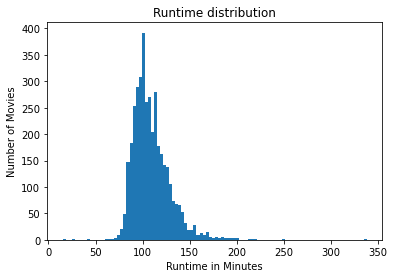

In [29]:
#Histogram of the distribution of runtimes of all movies
# x-axis
plt.xlabel('Runtime in Minutes')
# y-axis
plt.ylabel('Number of Movies')
# Title of the histogram
plt.title('Runtime distribution')
# Plot a histogram
plt.hist(df['runtime'], bins = 100);

>Most movies have a runtime between 90min and 120min

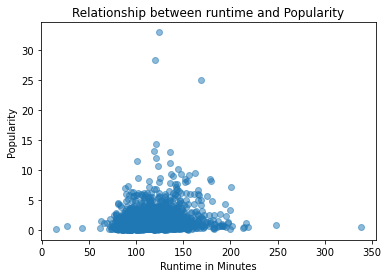

In [30]:
#Relation between runtime and popularity
# x-axis
plt.xlabel('Runtime in Minutes')
# y-axis
plt.ylabel('Popularity')
# Title of the diagram
plt.title('Relationship between runtime and Popularity')
plt.scatter(df['runtime'], df['popularity'], alpha=0.5)
plt.show()

### Research Question 1.4: Which movie has the highest and lowes profit and relation of profit to runtime and popularity??

Create column profit

In [31]:
# Substract the budget from the revenue to claculate profit
df['profit'] = df['revenue'] - df['budget']
# Display new dataset
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,profit
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,1.363529e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015,2.284364e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015,1.852382e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015,1.868178e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015,1.316249e+09


In [32]:
# Movie with highest profit
highest_profit = df.loc[df['profit'].idxmax()]
print('The movie {} has the highest profit of {} dollars.'.format(highest_profit['original_title'],highest_profit['profit']))

The movie Avatar has the highest profit of 2544505847.0 dollars.


In [33]:
# Movie with lowest profit
lowest_profit = df.loc[df['profit'].idxmin()]
print('The movie {} has the lowest profit of {} dollars.'.format(lowest_profit['original_title'],lowest_profit['profit']))

The movie The Warrior's Way has the lowest profit of -413912431.0 dollars.


>Avatar had the highest profit of 2544505847 Dollars.
>The Warrior's Ways had the lowest profit of -413912431 dollars.

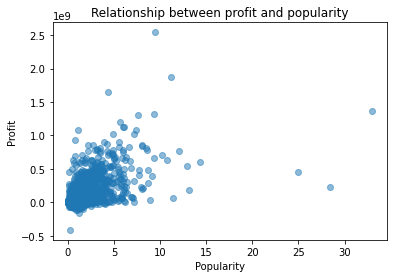

In [34]:
#Relation between profit and popularity
# x-axis
plt.xlabel('Popularity')
# y-axis
plt.ylabel('Profit')
# Title of the diagram
plt.title('Relationship between profit and popularity')
plt.scatter(df['popularity'], df['profit'], alpha=0.5)
plt.show()

Here, i can be seen that popularity will not gaurantee huge amounts of profit.

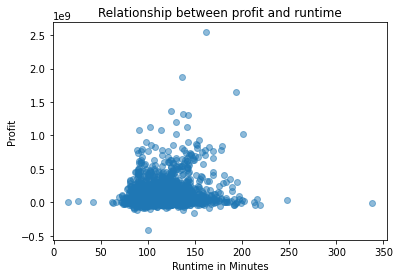

In [35]:
#Relation between profit and runtime
# x-axis
plt.xlabel('Runtime in Minutes')
# y-axis
plt.ylabel('Profit')
# Title of the diagram
plt.title('Relationship between profit and runtime')
plt.scatter(df['runtime'], df['profit'], alpha=0.5)
plt.show()

It can be observed that you need at least movie that runs longer than around 75min to achieve some profit. Also In case a movie is longer than around 220min you will not achieve any profit.

### Research Question 1.5: Which movie has the highest and lowest buget and relation of budget to profit, runtime and popularity??

In [36]:
# Movie with highest budget
highest_budget = df.loc[df['budget'].idxmax()]
print('The movie {} has the highest budget of {} dollars.'.format(highest_budget['original_title'],highest_budget['budget']))

The movie The Warrior's Way has the highest budget of 425000000.0 dollars.


In [37]:
# Movie with lowest budget
lowest_budget = df.loc[df['budget'].idxmin()]
print('The movie {} has the lowest budget of {} dollars.'.format(lowest_budget['original_title'],lowest_budget['budget']))

The movie Lost & Found has the lowest budget of 1.0 dollars.


>The Warrior's Way had the highest buget of 425000000 Dollars.
>Lost & Found had the lowest budget of 1 dollar.

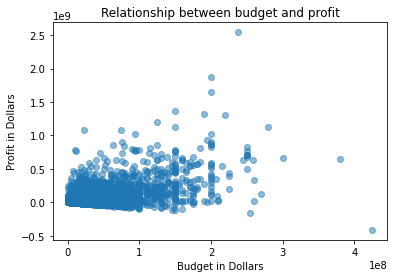

In [38]:
#Relationship between Profit and Budget
# x-axis
plt.xlabel('Budget in Dollars')
# y-axis
plt.ylabel('Profit in Dollars')
# Title of the diagramm
plt.title('Relationship between budget and profit')
plt.scatter(df['budget'], df['profit'], alpha=0.5)
plt.show()

This shows that there is no super obivous connection between budgert spend and achieved profit. However, the movies that had the hights budget, were also the ones that made the most profit. 

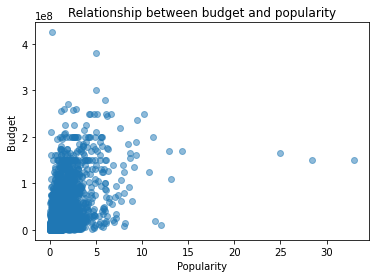

In [39]:
#Relationship between Budget and Popularity
# x-axis
plt.xlabel('Popularity')
# y-axis
plt.ylabel('Budget')
# Title of the diagramm
plt.title('Relationship between budget and popularity')
plt.scatter(df['popularity'], df['budget'], alpha=0.5)
plt.show()

Here you have extremes pon both ends. The movies with th emost budget weren't the movies that are the most popular. Movies with medium budget  achieved high popularity ratings, and movies with very high budget actually performed very poorly in terms of popularity.

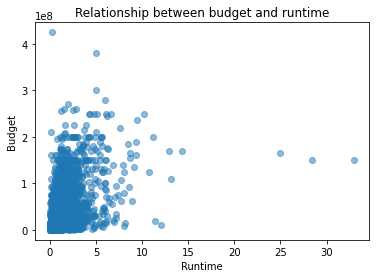

In [40]:
#Relationship between Budget and Runtime
# x-axis
plt.xlabel('Runtime')
# y-axis
plt.ylabel('Budget')
# Title of the diagramm
plt.title('Relationship between budget and runtime')
plt.scatter(df['popularity'], df['budget'], alpha=0.5)
plt.show()

### Research Question 2: Which genre was most produced above the 75% percentile mark of popularity?

In [41]:
#Above which popularity score are the top 25% movies.
popularity_threshold = np.percentile(df['popularity'], 75)
print('The popularity threshold is {}!'.format(popularity_threshold))

The popularity threshold is 1.368324!


In [42]:
# Dataframe which has data of movies which are most popular.
tmdb_popular_df = df[df['popularity'] >= popularity_threshold]
# Reindexing the dataframe
tmdb_popular_df.index = range(len(tmdb_popular_df))
#showing the dataset
tmdb_popular_df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,profit
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,1.363529e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015,2.284364e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015,1.852382e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015,1.868178e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015,1.316249e+09


In [43]:
# This will first concat all the data with | from the whole column and then split it using | and count the number of times it occured. 
genres_count = pd.Series(tmdb_popular_df['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
genres_count.head(5)

Action       374
Drama        329
Adventure    319
Thriller     306
Comedy       298
dtype: int64

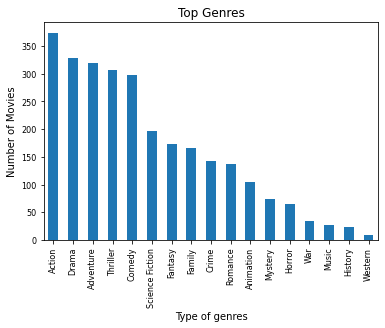

In [44]:
# Setting up the visualization
diagram = genres_count.plot.bar(fontsize = 8)
# Set a title
diagram.set(title = 'Top Genres')
# x-label and y-label
diagram.set_xlabel('Type of genres')
diagram.set_ylabel('Number of Movies')
# Show the plot
plt.show(5)

> Within the most popular movies, you can find most to be of the genre Action,Drama Adventure, Thriller,Comedy

### Research Question 3: Which cast was most selected?

In [45]:
# This will first concat all the data with | from the whole column and then split it using | and count the number of times it occured. 
cast_count = pd.Series(tmdb_popular_df['cast'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
cast_count.head(20)

Robert De Niro           19
Tom Hanks                18
Brad Pitt                18
Bruce Willis             18
Jason Statham            17
Johnny Depp              17
Tom Cruise               17
Cameron Diaz             16
Liam Neeson              15
Will Smith               14
Samuel L. Jackson        14
Harrison Ford            14
Leonardo DiCaprio        14
Ewan McGregor            13
Arnold Schwarzenegger    13
Jim Carrey               13
Mark Wahlberg            13
Gary Oldman              12
Sylvester Stallone       12
Bradley Cooper           12
dtype: int64

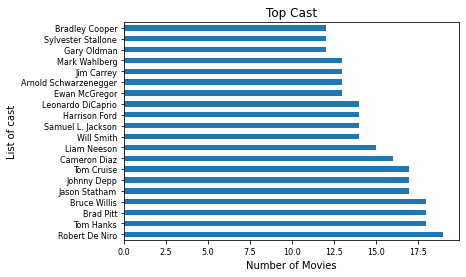

In [46]:
# Setting up the visualization
diagram = cast_count.head(20).plot.barh(fontsize = 8)
# Set a title
diagram.set(title = 'Top Cast')
# x-label and y-label
diagram.set_xlabel('Number of Movies')
diagram.set_ylabel('List of cast')
# Show the plot
plt.show()

> Within the most popular movies, you can find most to have casted Robert De Niro, Tom Hanks, Bruce Willis, Brad Pitt, Jason Statham.

<a id='conclusions'></a>
## Conclusions

**My conclusions are:** 

The most popular movie is Jurassic World and the least popular movie is Born into Brothels

The average runtime of the movies can be arround 109 Minutes and most movies have a runtime between 90min and 120min
The longest movie is Carlos with a runtime of 338min and the shortest movie is Kid's Story wiht a runtime of 15min.

Avatar had the highest profit of 2544505847 Dollars.

The Top 5 most popular genres are Action,Drama Adventure, Thriller,Comedy.

The Top 5 most casted actors of the most popular movies are Robert De Niro, Tom Hanks, Bruce Willis, Brad Pitt, Jason Statham..


**The limitations associated with the conclusions are:**
I actually had to delete a lot of data so the conclusion might not be super accurate.

Just because a movie is of a certain genre or a certain actor was casted will not result in a very popular movie. There is no gaurantee.